<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_%E4%B8%80%E5%80%8B%E4%BE%8B%E5%AD%90_%E8%AA%AA%E6%98%8E%E6%8E%A8%E8%AB%96%E7%B5%B1%E8%A8%88%E5%90%AB%E4%BF%A1%E5%BF%83%E5%8D%80%E9%96%93%E5%81%87%E8%A8%AD%E6%AA%A2%E5%AE%9A_%E5%B0%8F%E6%9B%B4%E6%96%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一個例子，說明推論統計，含信心區間，假設檢定

# 參考:

- Python for Data Analysis Part 23: Point Estimates and Confidence Intervals
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html

- Python for Data Analysis Part 24: Hypothesis Testing and the T-Test
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

In [46]:
import numpy      as np
import scipy.special  as sp
import scipy.stats   as st

import statsmodels.api as sm

import pandas       as pd
import pandas_datareader as pdr



In [ ]:
# 期末考題


$
\bar{X}=\frac{1}{n}\sum_{i}^{n}X_i
\\
S^2=\frac{1}{n-1}\sum_{i}^{n}(X_i-\bar{X})^2
\\
T=\frac{\bar{X}-\mu}{S/\sqrt{n}}
\\
\mu
\\
\sigma
$

In [48]:
n=10
st.chi2.cdf(9.9, df=n-1)

0.6413586587715617

In [49]:
st.chi2.cdf(.81, df=n-1)

0.0002352965207596928

In [98]:
X.hist?

count    10000.0
mean       159.8
std          9.9
min        122.6
25%        153.1
50%        159.7
75%        166.5
max        198.0
dtype: float64

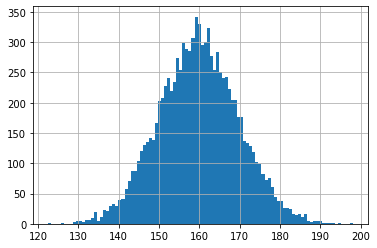

In [100]:
# 先來製造一堆 (size= 10000) 符合此種分布的實驗數據
np.random.seed(0)
X= st.norm.rvs(size=10000, loc= 160, scale=10)
X= pd.Series(X)
X.hist(bins= 100, grid=True)
X.describe().round(1)

In [109]:
np.random.seed(0)
smpSize= 10
smpX= X.sample(n= smpSize)
smpX.round(1)
aDF= pd.DataFrame(smpX,columns=['身高(cm)'])
aDF.index.name='學號'
aDF.T.round(1)

學號,9394,898,2398,5906,2343,8225,5506,6451,2670,3497
身高(cm),147.6,185.9,154.0,147.2,168.6,146.8,162.6,164.1,152.2,171.8


In [107]:
aDF.round(1).values

array([[147.6],
       [185.9],
       [154. ],
       [147.2],
       [168.6],
       [146.8],
       [162.6],
       [164.1],
       [152.2],
       [171.8]])

count     10.0
mean     160.1
std       12.9
min      146.8
25%      148.8
50%      158.3
75%      167.5
max      185.9
dtype: float64

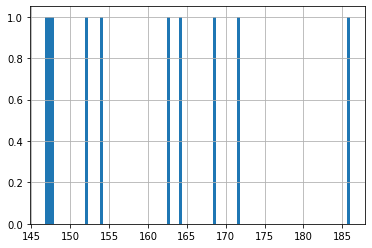

In [108]:

smpX.hist(bins=100)
smpX.describe().round(1)

In [110]:
st.t.interval(.95, df= smpSize-1, loc= smpX.mean(), scale= st.sem(smpX))

(150.85182114653693, 169.31493885358194)

In [112]:
st.t.interval(.90, df= smpSize-1, loc= smpX.mean(), scale= st.sem(smpX))

(152.60269289234284, 167.56406710777603)

In [134]:
np.random.seed(0) #000
smpSize= 20
smpX= X.sample(n= smpSize)
smpX.round(1)
aDF= pd.DataFrame(smpX,columns=['身高(cm)'])
aDF.index.name='學號'
#aDF.round(1)

aDF.iloc[:10,:].T.round(1)

學號,9394,898,2398,5906,2343,8225,5506,6451,2670,3497
身高(cm),147.6,185.9,154.0,147.2,168.6,146.8,162.6,164.1,152.2,171.8


In [135]:
aDF.iloc[10:,:].T.round(1)

學號,1087,1819,2308,6084,3724,3184,6387,3728,2702,7883
身高(cm),151.4,152.0,177.1,155.1,159.8,188.0,163.7,178.6,144.0,161.8


In [132]:
st.t.interval(.95, df= smpSize-1, loc= smpX.mean(), scale= st.sem(smpX))


(154.77304689005575, 161.86126002962692)

# 先玩一下 Gamma 函數，$\Gamma()$
## https://en.wikipedia.org/wiki/Gamma_function
$
\Gamma(.5)= \sqrt{\pi} 
\\
\Gamma(1)= 1
$ 

$
\Gamma(n) = (n-1)! 
\\
\Gamma(10) = (9)! = 9*8*7*...*1*\Gamma(1)
\\
\Gamma(10.5) = (9.5)! = 9.5*8.5*7.5*...*1.5*.5*\Gamma(.5)
$ 

In [ ]:
sp.gamma(.5), \
np.pi**.5

(1.7724538509055159, 1.7724538509055159)

In [ ]:
sp.gamma(10.5)

1133278.3889487856

In [ ]:
s= np.pi**.5
for k in range(0, 10):
  s *= k+.5
s

1133278.3889487856

In [ ]:
sL= np.arange(0.5, 10.5)
sL

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [ ]:
sL.prod() * (np.pi**.5)

1133278.3889487854

# 複習一下 $\chi^2$ 分布
## https://en.wikipedia.org/wiki/Chi-square_distribution

$\chi^2 = Z^2$

$\chi^2(df= k) = Z_1^2 + Z_2^2 +...+ Z_k^2$

count    10000.000000
mean         9.911217
std          4.414970
min          0.936003
25%          6.691239
50%          9.245388
75%         12.499445
max         37.734087
dtype: float64

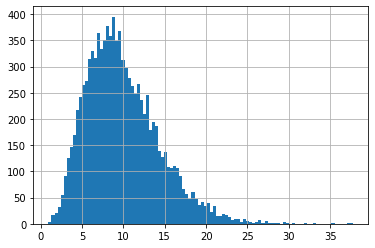

In [ ]:
# 先來製造一堆 (size= 10000) 符合此種分布的實驗數據
X2= st.chi2.rvs(df= 10,size= 10000)
X2= pd.Series(X2)
X2.hist(bins= 100)
X2.describe()

In [ ]:
# 理論值
st.chi2(df=10).mean(), \
st.chi2(df=10).var(), \
st.chi2(df=10).std()

(10.0, 20.0, 4.47213595499958)

# 再來看一下  (Student's ) T 分布
## https://en.wikipedia.org/wiki/Student%27s_t-distribution


count    10000.000000
mean         0.015062
std          1.124332
min         -4.448777
25%         -0.697073
50%          0.013173
75%          0.721787
max          6.888755
dtype: float64

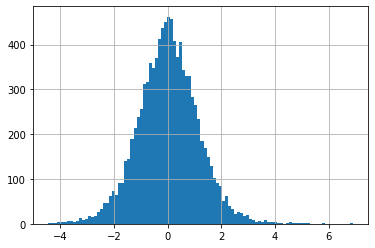

In [ ]:
# 先來製造一堆 (size= 10000) 符合此種分布的實驗數據
T=st.t.rvs(df=10,size=10000)
T=pd.Series(T)
T.hist(bins=100)
T.describe()

In [ ]:
# 理論值
st.t(df=10).mean(), \
st.t(df=10).var(), \
st.t(df=10).std()

(0.0, 1.25, 1.118033988749895)

# 回頭再來看看常態分布

## https://en.wikipedia.org/wiki/Normal_distribution

(0       2.810562
 1      -0.572870
 2      -0.394804
 3       0.498692
 4      -1.321490
           ...   
 9995   -0.436570
 9996    0.324868
 9997   -1.088277
 9998   -0.669305
 9999   -1.309936
 Length: 10000, dtype: float64, count    10000.000000
 mean        -0.005333
 std          1.001080
 min         -4.195325
 25%         -0.678763
 50%         -0.003989
 75%          0.676704
 max          3.934397
 dtype: float64)

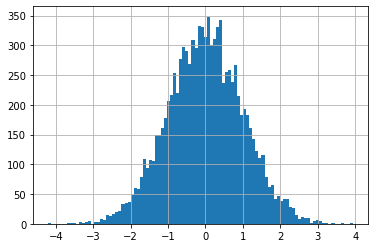

In [ ]:
# 也是先製造一堆數據

Z=st.norm.rvs(size=10000)
Z=pd.Series(Z)
Z.hist(bins=100)

Z,\
Z.describe()

(count    10000.000000
 mean        -0.005333
 std          1.001080
 min         -4.195325
 25%         -0.678763
 50%         -0.003989
 75%          0.676704
 max          3.934397
 dtype: float64, count    10000.000000
 mean         9.989335
 std          2.002161
 min          1.609351
 25%          8.642474
 50%          9.992022
 75%         11.353409
 max         17.868794
 dtype: float64)

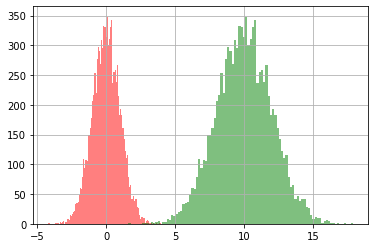

In [ ]:
Y= Z*2+10

Z.hist(bins=100, alpha=.5, color='r')
Y.hist(bins=100, alpha=.5, color='g')

Z.describe(), \
Y.describe()

count    11.000000
mean      9.478110
std       2.792118
min       5.471094
25%       7.757246
50%       9.489019
75%      11.717706
max      13.863208
dtype: float64

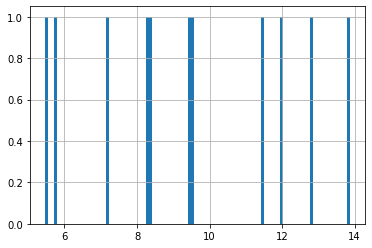

In [ ]:
smpSize= 11
smpY= Y.sample(n= smpSize)
smpY.hist(bins=100)
smpY.describe()


In [ ]:
st.sem(smpY), \
smpY.std()/smpY.size**.5

(0.8418553618265722, 0.8418553618265722)

In [ ]:
# df= 10 的 T，其95% 的信心區間可背一下以 0為中心，左右 +/- 2.228
t95_df10_Int= st.t.interval(.95, df= 10)
t95_df10_Int

(-2.2281388519649385, 2.2281388519649385)

In [ ]:
# 自己搭配 confidence interval 公式來計算

sem= t95_df10_Int[1] * smpY.std() / smpY.size**.5

y95CI= smpY.mean()-abs(sem), smpY.mean()+abs(sem) 
y95CI

(7.6023389845700295, 11.353880263411602)

In [ ]:
# 直接使用 scipy.stats 的函數，參數要設好.

y95CI_直接使用st函數=  \
st.t.interval(.95, 
      df= smpY.size-1, 
      loc= smpY.mean(), 
      scale=st.sem(smpY))

y95CI_直接使用st函數



(7.6023389845700295, 11.353880263411602)

# y95CI 的解釋

y95CI 的意義是指 我們製作出來 的 信心區間 smpY.mean() +/- sem 
會包含 Y.mean() 的機率有 95%

我們用以下程式碼片段來模擬及驗證此敘述。

In [ ]:

smpSize= 11
intervalL= []
for i in range(1000):
  smpY= Y.sample(n= smpSize)
  interval= st.t.interval(.95, df=smpY.size-1, 
        loc=smpY.mean(), 
        scale=st.sem(smpY))
  intervalL += [interval]

qq= pd.DataFrame(columns=['x1','x2'])
qq['x1']= [x1 for x1,x2 in intervalL]
qq['x2']= [x2 for x1,x2 in intervalL]

whether_mean_in_interval= ( (Y.mean()>=qq['x1']) & (Y.mean()<=qq['x2']) )

qq


,x1,x2
0,8.187791,10.984435
1,8.895977,11.794198
2,9.214696,10.913145
3,8.359473,10.928556
4,8.421351,12.333428
...,...,...
995,8.879869,11.156332
996,10.220592,12.027181
997,7.917254,10.653811
998,7.295462,10.679725


In [ ]:

whether_mean_in_interval


0       True
1       True
2       True
3       True
4       True
       ...  
995     True
996    False
997     True
998     True
999     True
Length: 1000, dtype: bool

In [ ]:
qq[whether_mean_in_interval]

,x1,x2
0,8.187791,10.984435
1,8.895977,11.794198
2,9.214696,10.913145
3,8.359473,10.928556
4,8.421351,12.333428
...,...,...
994,8.523632,11.362508
995,8.879869,11.156332
997,7.917254,10.653811
998,7.295462,10.679725


In [ ]:
muL= [7,8,9,10,11,12,13]
tValue, pValue_2side= st.ttest_1samp(smpY.values, muL)
pValue_1side= pValue_2side/2
muL, tValue, pValue_2side, pValue_1side

([7, 8, 9, 10, 11, 12, 13],
 array([ 5.29561726,  3.47580273,  1.65598819, -0.16382634, -1.98364088,
        -3.80345542, -5.62326995]),
 array([3.49730403e-04, 5.96292183e-03, 1.28722196e-01, 8.73131650e-01,
        7.54145222e-02, 3.46613846e-03, 2.20457360e-04]),
 array([1.74865201e-04, 2.98146091e-03, 6.43610980e-02, 4.36565825e-01,
        3.77072611e-02, 1.73306923e-03, 1.10228680e-04]))

In [ ]:
# mu0= 7,8,9 時， tValue > 2.228，對應了 pValue_2side < 0.05 或 pValue_1side < 0.025
# 由於  pValue < 臨界值 alpha 
# 因此 mu= 7,8,9 這三種假設 會被 否決

# 簡單來講，樣本證據與假設值 mu0 的 tValue 代表他們之間的 差異值 或 距離， 
# 此值的大小在 2.228 以上算是差異【顯著】(significant)，
# 它會對應 pValue 在 0.05 以下。

# 為何 |tValue| > 2.228 算是差異【顯著】，主要是因為 2.228 是靠 pValue = 0.05, 以及 df=10 算出來的
# 如果 大家約定 pValue= 0.05 以下算是 公認的 【小】機率，那麼就可認定 |tValue| > 2.228 以上叫做差異很【顯著】

# 在強調一次  tValue= 2.228 是靠 pValue = .05 = 5% 以及 df= 10 算出來的
# ==================================================================================

st.t.ppf(.05/2, df=10)

-2.2281388519649385

In [ ]:
# 令 df= 10,100,1000
# 令機率臨界值 alpha= 10%, 5%, 1%
# 把 把對應的 tValue 通通算一下。
 
st.t.ppf(.10/2, df=10), st.t.ppf(.05/2, df=10), st.t.ppf(.01/2, df=10)

(-1.8124611228107341, -2.2281388519649385, -3.169272667175838)

In [ ]:
st.t.ppf(.10/2, df=100), st.t.ppf(.05/2, df=100), st.t.ppf(.01/2, df=100)


(-1.6602343260657506, -1.983971518449634, -2.625890520586334)

In [ ]:
st.t.ppf(.10/2, df=1000), st.t.ppf(.05/2, df=1000), st.t.ppf(.01/2, df=1000)

(-1.6463788172854645, -1.9623390808264078, -2.5807546980659426)

In [ ]:
  smpY= Y.sample(n= smpSize)
  interval= st.t.interval(.95, 
        df=smpY.size-1, 
        loc=smpY.mean(), 
        scale=st.sem(smpY))
  Y.mean(), \
  smpY.values, \
  smpY.mean(), \
  smpY.std(),  \
  smpY.std()/smpY.size**.5, \
  st.sem(smpY), \
  interval


(9.989334610298846,
 array([ 8.57105874, 11.7045209 , 11.45923092, 11.0463524 ,  6.97805363,
         8.25367287, 11.36935408,  9.48133976, 10.66163195,  8.86094007,
        14.68033809]),
 10.27877212892592,
 2.1279886352970667,
 0.6416127146746189,
 0.6416127146746189,
 (8.849169911444708, 11.708374346407133))

In [ ]:
# 不能否決假設之區域 (接受假設之區域)
aL=[]
for mu in np.linspace(interval[0], interval[1], 11):
  tV, pV= st.ttest_1samp(smpY, mu)
  aL += [(mu, tV,pV)]
aL


[(8.849169911444708, 2.228138851964944, 0.05000000000180814),
 (9.135090354940951, 1.7825110815719551, 0.10499776190472775),
 (9.421010798437193, 1.336883311178969, 0.21087735831876053),
 (9.706931241933436, 0.8912555407859803, 0.39373097923150346),
 (9.992851685429677, 0.44562777039299434, 0.6653586583557851),
 (10.27877212892592, 5.537162212569602e-15, 0.9999999999999957),
 (10.564692572422164, -0.44562777039298324, 0.6653586583557929),
 (10.850613015918405, -0.8912555407859692, 0.393730979231509),
 (11.136533459414649, -1.336883311178958, 0.21087735831876395),
 (11.42245390291089, -1.782511081571944, 0.10499776190472968),
 (11.708374346407133, -2.2281388519649328, 0.05000000000180908)]

In [ ]:
# 否決假設之區域
bL=[]
for mu in np.linspace(interval[0]-10, interval[0], 11):
  tV, pV= st.ttest_1samp(smpY, mu)
  bL += [(mu, tV,pV)]
bL

[(-1.150830088555292, 17.813864900226477, 6.633601320940808e-09),
 (-0.150830088555292, 16.255292295400324, 1.6113704100310955e-08),
 (0.849169911444708, 14.69671969057417, 4.253882057876952e-08),
 (1.849169911444708, 13.138147085748017, 1.24056680116563e-07),
 (2.849169911444708, 11.579574480921863, 4.0826059172206314e-07),
 (3.849169911444708, 10.02100187609571, 1.5592736555930527e-06),
 (4.849169911444708, 8.462429271269556, 7.173956245133268e-06),
 (5.849169911444708, 6.903856666443404, 4.1747379022179174e-05),
 (6.849169911444708, 5.34528406161725, 0.00032578428476510264),
 (7.849169911444708, 3.786711456791097, 0.0035625368353336693),
 (8.849169911444708, 2.228138851964944, 0.05000000000180814)]

In [ ]:
# 否決假設之區域
cL=[]
for mu in np.linspace(interval[1], interval[1]+10, 11):
  tV, pV= st.ttest_1samp(smpY, mu)
  cL += [(mu, tV,pV)]
cL

[(11.708374346407133, -2.2281388519649328, 0.05000000000180908),
 (12.708374346407133, -3.7867114567910862, 0.0035625368353337326),
 (13.708374346407133, -5.345284061617239, 0.00032578428476510773),
 (14.708374346407133, -6.903856666443392, 4.1747379022179777e-05),
 (15.708374346407133, -8.462429271269546, 7.173956245133346e-06),
 (16.708374346407133, -10.0210018760957, 1.5592736555930695e-06),
 (17.708374346407133, -11.579574480921853, 4.0826059172206685e-07),
 (18.708374346407133, -13.138147085748006, 1.2405668011656408e-07),
 (19.708374346407133, -14.696719690574158, 4.253882057876975e-08),
 (20.708374346407133, -16.255292295400313, 1.6113704100311124e-08),
 (21.708374346407133, -17.813864900226466, 6.633601320940831e-09)]

In [ ]:
# 以下 作廢

In [ ]:
import pandas_datareader as pdr

In [ ]:
Z= st.norm.rvs(size=1000)
Z= pd.Series(Z)
Z.describe()


count    1000.000000
mean       -0.025885
std         1.012249
min        -3.219903
25%        -0.705458
50%        -0.035892
75%         0.675633
max         2.913411
dtype: float64

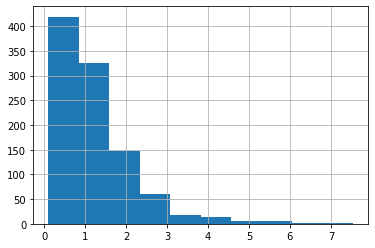

In [ ]:
(2**Z).hist()

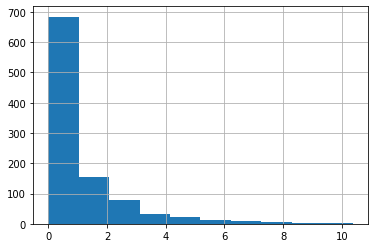

In [ ]:
(Z**2).hist()

count    1000.000000
mean       -0.009139
std         1.048883
min        -2.988900
25%        -0.715849
50%        -0.029848
75%         0.702250
max         3.546600
dtype: float64

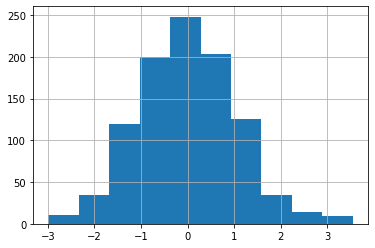

In [ ]:
n= 1000
Z= st.norm.rvs(size= n)
Z= pd.Series(Z)
#Z.plot()
Z.hist()
Z.describe()

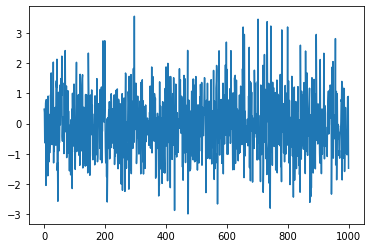

In [ ]:
Z.plot()

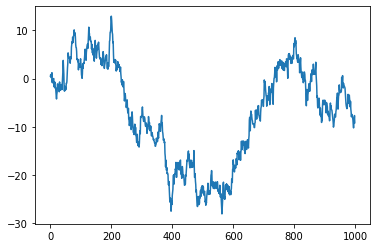

In [ ]:
Z.cumsum().plot()

In [ ]:
import numpy as np
np.log(2)

0.6931471805599453

In [ ]:
import sympy as sp

In [ ]:
x,y,z= sp.symbols('x y z')
x,y,z

(x, y, z)

In [ ]:
sp.integrate(z**4 * sp.exp(-z**2/2)
       /sp.sqrt(2*sp.pi), 
       (z, -sp.oo, sp.oo))


3

In [ ]:
value= sp.integrate(y**2 * sp.exp(-y/2) *y**(-1/2)
       /sp.sqrt(2*sp.pi)/2, 
       (y, 0, sp.oo))
value

1.87997120597325*sqrt(2)/sqrt(pi)

In [ ]:
float(value)

1.5

In [ ]:
value= sp.integrate(y**2 * sp.exp(-y/2) *y**(-1/2) /sp.gamma(1/2)/2**(1/2),
       #/sp.sqrt(2*sp.pi)/2, 
       (y, 0, sp.oo))
value


3.00000000000000

In [ ]:
f= sp.exp(-x/2)*x**(-1/2)/sp.sqrt(2*sp.pi)
f

sqrt(2)*x**(-0.5)*exp(-x/2)/(2*sqrt(pi))